In [6]:
%matplotlib notebook
# from djexpcode.schemas import *
from wfield import *
from djexpcode import *

import djexpcode
pngsavepath = os.path.abspath(pjoin(os.path.dirname(
    os.path.dirname(djexpcode.__file__)),'figures','figure1/wfield_examples'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
# For exporting notebook to bitbucket
# % matplotlib inline
from djexpcode.schemas import *

Connecting root@localhost:3306


In [7]:
# load stimuli
key = dict(mouse_id = 'JC092',
           session_name = '190126_JC092_2P_S1_JC',
           session_subname = 'run00_closedLoopActuator')
expname = '190124_JC092_1P_JC'
from wfield.allen import load_refregions
from wfield import *
from tifffile import imread
from glob import glob
# Load ref regions
refregions = load_refregions()
# Load data
oriim = imread('/quadraraid/data/1photon/raw/190124_JC092_1P_JC/run00_closedLoopActuator/20190124_run000_00000000.tif').mean(axis = 0)
stimglobs = ['/mnt/nerfhf01/boninwip/data/analysis/190124_JC092_1P_JC/run02_retino_circling_noise_circle_whiskers/stimaverages_cam3/*.tif']
stims = []
for gl in tqdm(stimglobs):
    ls = np.sort(glob(gl))
    for f in ls:
        stims.append(imread(f))

In [8]:
# load reference parameters
resmanual = (ReferenceWindow() & key).fetch(as_dict = True)[0]
oriim = resmanual['refim']
refpar = (AllenReferenceParameters() & key).fetch(as_dict = True)[0]
mask = make_circle_mask(resmanual['circlepar'],oriim)

extent = imshow_window(oriim[:,::-1],resmanual,plot = False)
from wfield.allen import load_refregions
refregions = load_refregions()
nrefregions = adjust_allen_areas(refregions,**refpar)

In [9]:
# Compute the stimuli stds
from wfield import fft_movie
tmpmovie = stims[0].copy()
tmpmovie[:,:10,:10] = 0
tmpmovie = medfilt2d(tmpmovie,30)
visstd = np.std(tmpmovie,axis = 0)

tmpmovie = stims[1].copy()
tmpmovie[:,:10,:10] = 0
tmpmovie = medfilt2d(tmpmovie,30)
puffstd = np.std(tmpmovie,axis = 0)

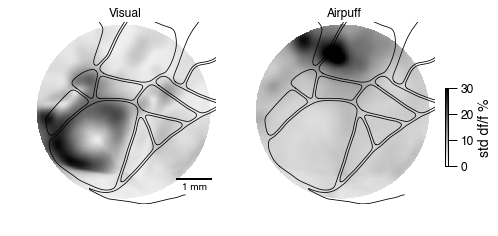

In [85]:
%matplotlib inline
w = 3.6
fig = plt.figure(figsize = [w*2,w])
# visual
plt.subplot(1,2,1)
tmp = 100*visstd
tmp[mask==0] = np.nan
plt.imshow(tmp[:,::-1],extent = extent,cmap = 'gray_r',alpha = 1,clim = [0,30])
plot_allen_areas(nrefregions,color='k',alpha = 1,plotnames = False,lw = 0.8);
plt.axis(extent)
plt.plot([1.5,2.5],[1.9,1.9],'k',lw = 2);
plt.text(2,2.0,'1 mm',fontsize = 10,va = 'top',ha = 'center')
plt.axis('off')
plt.title('Visual',fontsize = 12)
# airpuff
plt.subplot(1,2,2)
tmp = 100*puffstd
tmp[mask==0] = np.nan
im = plt.imshow(tmp[:,::-1],extent = extent,cmap = 'gray_r',alpha = 1,clim = [0,30])
plot_allen_areas(nrefregions,color='k',alpha = 1,plotnames = False,lw = 0.8);
plt.axis(extent)
plt.axis('off')
plt.title('Airpuff',fontsize = 12)
# colorbar
cax = fig.add_axes([.92,.3,.005,.3])
plt.colorbar(im,cax = cax,label = 'std df/f %')

# save
fname = pjoin(pdfsavepath,'JC092_example_wfield_visual_tactile_{0}.pdf'.format(expname))
plt.savefig(fname);
fname = pjoin(pngsavepath,'JC092_example_wfield_visual_tactile_{0}.png'.format(expname))
plt.savefig(fname);


In [10]:
%matplotlib notebook


<IPython.core.display.Javascript object>


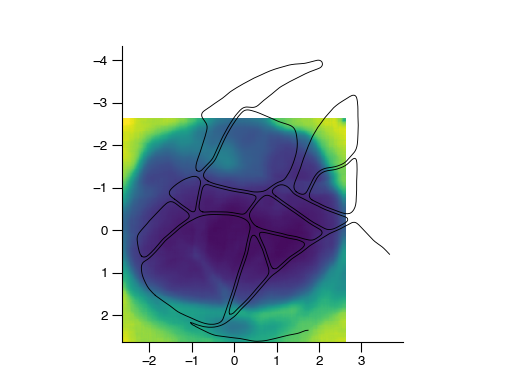

In [13]:
nb_play_movie(tmpmovie[:,:,::-1],extent=extent)
plot_allen_areas(nrefregions,color='k',alpha = 1,plotnames = False,lw = 0.8);
